# Testing Protein Language Models

This main objective of this notebook is to run and evaluate some protein language models (PLM), as they have many applications in drug discovery process. Some of the popular PLMs are :
* IgLM:
    * Generative Language Modeling for Antibody Design.
    * GitHub: https://github.com/Graylab/IgLM
* CARP:
    * Developed by Microsoft, Convolutional autoencoding representations of proteins (CARP)
    * GitHub: https://github.com/microsoft/protein-sequence-models
* ESM (Evolutionary Scale Modeling):
    * Developed by Facebook AI, ESM models are trained on large-scale protein sequence data and can predict protein structure and function.
    * GitHub: https://github.com/facebookresearch/esm
* ProtBERT:
    * Based on the BERT architecture, ProtBERT is trained on protein sequences and can be used for tasks like protein classification and function prediction.
    * GitHub: https://github.com/agemagician/ProtTrans
* ProGen (Protein generation model):
    * Developed by Salesforce, a suite of open-sourced projects and models for protein engineering and design.
    * GitHub: https://github.com/salesforce/progen
* TAPE (Tasks Assessing Protein Embeddings):
    * A benchmark suite for evaluating protein embeddings, TAPE includes models like ResNet, LSTM, and Transformer trained on protein sequences.
    * GitHub: https://github.com/songlab-cal/tape

**Summary**:
Most of the PLMs, other than IgLM, are some sort of embedding models that is trained on a large set of proteins to learn the internal pattern between amino acids within proteins, and they are best to be used for other downstream tasks like protein classifications.

It makes sense as I don't think generating a random sequence of brand-new protein from a handful of starting AAs, like what chatgpt does, is a common tasks in the drug discovery process. And the generated protein would require a lot of manual or iterative process to be evaluated properly. Most protein related tasks requires more specific alternation of a protein, and therefore would be masked self-attention kind of takes, rather than de-novo genAI PLMs.

One good example of genAI use case though is LgLM. It is more useful as it generates a very specific class of proteins (antibody) from some prompts. And it would have been better if we can use antigen information to guide the generation. 


In [3]:
# !pip install iglm
# !pip install numpy==1.24.1
# !pip install esm
# !pip install "fair-esm[esmfold]"
# !pip install scripts
# ! pip install sequence-models
# pip install git+https://github.com/aqlaboratory/openfold
# pip install modelcif


## LgLM

In [1]:
from iglm import IgLM

iglm = IgLM()

parent_sequence = "EVQLVESGGGLVQPGGSLRLSCAASGFNIKEYYMHWVRQAPGKGLEWVGLIDPEQGNTIYDPKFQDRATISADNSKNTAYLQMNSLRAEDTAVYYCARDTAAYFDYWGQGTLVTVS"
chain_token = "[HEAVY]"
species_token = "[HUMAN]"
infill_range = (98, 106)
num_seqs = 10

generated_seqs = iglm.infill(
    parent_sequence,
    chain_token,
    species_token,
    infill_range=infill_range,
    num_to_generate=num_seqs,
)

for seq in generated_seqs:
    print(seq)

/opt/anaconda3/envs/compbio/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/anaconda3/envs/compbio/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
100%|██████████| 10/10 [00:06<00:00,  1.60it/s]

EVQLVESGGGLVQPGGSLRLSCAASGFNIKEYYMHWVRQAPGKGLEWVGLIDPEQGNTIYDPKFQDRATISADNSKNTAYLQMNSLRAEDTAVYYCARGGSYRHPRYFDYWGQGTLVTVS
EVQLVESGGGLVQPGGSLRLSCAASGFNIKEYYMHWVRQAPGKGLEWVGLIDPEQGNTIYDPKFQDRATISADNSKNTAYLQMNSLRAEDTAVYYCARATYNWNDGGYWGQGTLVTVS
EVQLVESGGGLVQPGGSLRLSCAASGFNIKEYYMHWVRQAPGKGLEWVGLIDPEQGNTIYDPKFQDRATISADNSKNTAYLQMNSLRAEDTAVYYCARASDWLLKDYYHSGMGVWGQGTLVTVS
EVQLVESGGGLVQPGGSLRLSCAASGFNIKEYYMHWVRQAPGKGLEWVGLIDPEQGNTIYDPKFQDRATISADNSKNTAYLQMNSLRAEDTAVYYCARAYNGGPRNFDYWGQGTLVTVS
EVQLVESGGGLVQPGGSLRLSCAASGFNIKEYYMHWVRQAPGKGLEWVGLIDPEQGNTIYDPKFQDRATISADNSKNTAYLQMNSLRAEDTAVYYCARRIATGGHGSSYFDYWGQGTLVTVS
EVQLVESGGGLVQPGGSLRLSCAASGFNIKEYYMHWVRQAPGKGLEWVGLIDPEQGNTIYDPKFQDRATISADNSKNTAYLQMNSLRAEDTAVYYCARSLGLTGDGSNYYLDYWGQGTLVTVS
EVQLVESGGGLVQPGGSLRLSCAASGFNIKEYYMHWVRQAPGKGLEWVGLIDPEQGNTIYDPKFQDRATISADNSKNTAYLQMNSLRAEDTAVYYCARDRSTSGTRALGYWGQGTLVTVS
EVQLVESGGGLVQPGGSLRLSCAASGFNIKEYYMHWVRQAPGKGLEWVGLIDPEQGNTIYDPKFQDRATISADNSKNTAYLQMNSLRAEDTAVYYCARDSPLGTNDNAKIWGQGTLVTVS
EVQLVESGGGLVQPGGSLRLSCAASG

### Note

This model can generate antibody quickly with high diversity for further testing, and it's specifically for generating antibody sequences. You can either give it parent sequence and specify which section to change or just a short starting sequece for it to fulfil the whole chain.

However, if, for example, I wanted to target the LPAR1 as identified by the scRNA study, it would be more useful to have target information as well to guide the sequence generation. 

## CARP

In [4]:
from sequence_models.pretrained import load_model_and_alphabet

model, collater = load_model_and_alphabet('carp_38M')

seqs = [['MDREQ'], ['MGTRRLLP']]
x = collater(seqs)[0]  # (n, max_len)
rep = model(x)  # (n, max_len, d_model)
rep

Downloading: "https://zenodo.org/record/6564798/files/carp_38M.pt?download=1" to /Users/YaoSen/.cache/torch/hub/checkpoints/carp_38M.pt


{'representations': {16: tensor([[[-2.0405e+01,  1.0206e+02,  4.5566e+00,  ..., -4.6551e+00,
            -3.0751e+00, -4.4305e+00],
           [-3.4221e+01,  8.8823e+01, -9.3291e+00,  ..., -1.2850e+00,
            -1.1638e+01, -1.2119e+01],
           [-1.3651e+01,  6.0855e+01, -2.0119e-01,  ..., -7.6713e+00,
            -3.9048e+00, -3.2830e+00],
           ...,
           [-1.5238e+01,  6.6889e+01,  5.9905e+00,  ..., -7.7908e+00,
             4.3563e+00, -1.0762e+01],
           [-1.3288e+01,  6.5568e+01,  2.1068e+00,  ..., -7.7117e+00,
             3.2210e-01, -8.7059e+00],
           [-1.1331e+01,  6.9645e+01,  1.0567e+01,  ..., -2.8041e+00,
             6.3986e-01, -1.2206e+01]],
  
          [[-1.8122e+01,  9.5075e+01,  2.2027e+00,  ..., -3.2095e+00,
             3.9227e+00,  2.4225e+00],
           [-1.4233e+01,  7.4365e+01, -1.0507e+00,  ...,  3.4293e-01,
            -5.8676e-02, -2.7458e+00],
           [-2.2134e+01,  7.8612e+01,  6.3381e+00,  ...,  2.4423e+00,
             3.

In [9]:
rep["representations"][16].shape

torch.Size([2, 8, 1024])

### Note:

CARP was trained with CNN archetecture and is mainly for encoding sequences for other downstream tasks. And an application is to use the encoding in masked language model, which can predict or generate missing sections.

So strictly speaking, it is not a generative protein language model yet.

## ESM

In [8]:
# ! pip install "fair-esm[esmfold]"

# # OpenFold and its remaining dependency
# ! pip install 'dllogger @ git+https://github.com/NVIDIA/dllogger.git'
! pip install 'openfold @ git+https://github.com/aqlaboratory/openfold.git@4b41059694619831a7db195b7e0988fc4ff3a307'

# ! pip install matplotlib
# ! pip install numpy==1.24.1


  Cloning https://github.com/aqlaboratory/openfold.git (to revision 4b41059694619831a7db195b7e0988fc4ff3a307) to /private/var/folders/tv/6rtfy28j7r7fynsd3q3ks02r0000gn/T/pip-install-8ewmnk95/openfold_8cac5f5c8dc144eaa963a01032f9aeaf
  Running command git clone --filter=blob:none --quiet https://github.com/aqlaboratory/openfold.git /private/var/folders/tv/6rtfy28j7r7fynsd3q3ks02r0000gn/T/pip-install-8ewmnk95/openfold_8cac5f5c8dc144eaa963a01032f9aeaf
  Running command git rev-parse -q --verify 'sha^4b41059694619831a7db195b7e0988fc4ff3a307'
  Running command git fetch -q https://github.com/aqlaboratory/openfold.git 4b41059694619831a7db195b7e0988fc4ff3a307
  Running command git checkout -q 4b41059694619831a7db195b7e0988fc4ff3a307
  Resolved https://github.com/aqlaboratory/openfold.git to commit 4b41059694619831a7db195b7e0988fc4ff3a307
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  

In [1]:
import torch
from esm import pretrained

# Load the ESM model, choose a smaller model for faster performance
model, alphabet = pretrained.esm2_t6_8M_UR50D()
batch_converter = alphabet.get_batch_converter()

# Prepare your input data
data = [
    ("protein1", "EVQLVESGGGLVQPGGSLRLSCAASGFNIKEYYMHWVRQAPGKGLEWVGLIDPEQGNTIYDPKFQDRATISADNSKNTAYLQMNSLRAEDTAVYYCARDTAAYFDYWGQGTLVTVS")
]

# Convert data to batch
batch_labels, batch_strs, batch_tokens = batch_converter(data)

# Run the model
with torch.no_grad():
    results = model(batch_tokens, repr_layers=[6])

# Extract the embeddings
embeddings = results["representations"][6]
print(embeddings)

tensor([[[-0.0254,  0.7933,  0.1060,  ...,  1.0665,  0.0053, -0.6065],
         [-0.0376, -0.1932,  0.0291,  ...,  0.5904,  0.0886, -0.0945],
         [-0.6551, -0.1372,  0.4638,  ...,  0.9229, -0.1696,  0.3219],
         ...,
         [-0.4706,  0.0820,  0.5230,  ...,  0.9138, -0.0036,  0.0226],
         [-0.3164, -0.6735, -0.2033,  ...,  0.2453,  0.0691, -0.0393],
         [-0.1841, -0.3098,  0.1567,  ...,  0.2610, -0.7816, -0.3093]]])


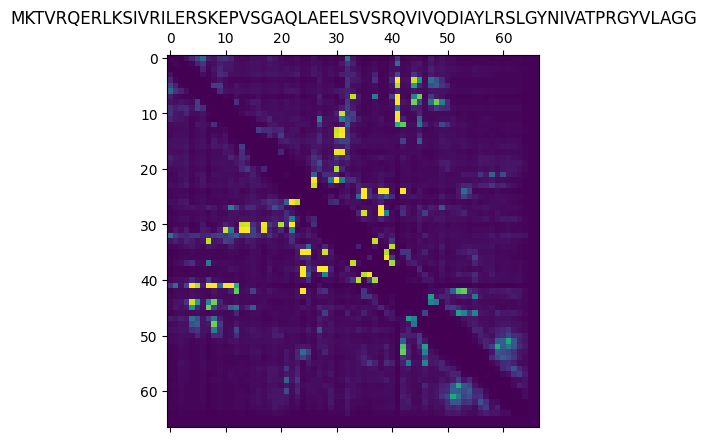

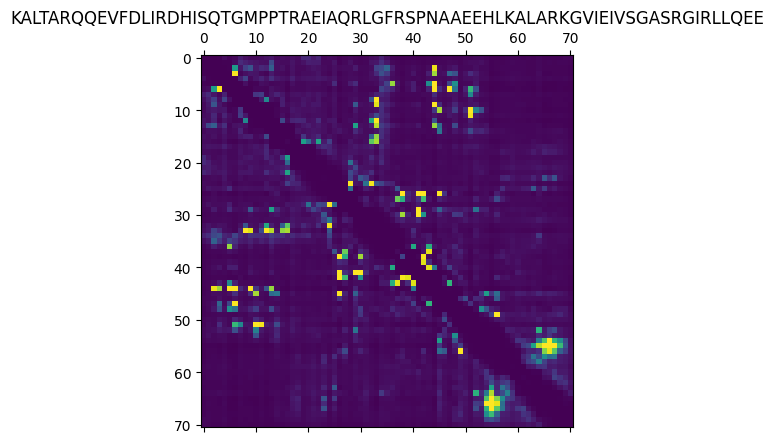

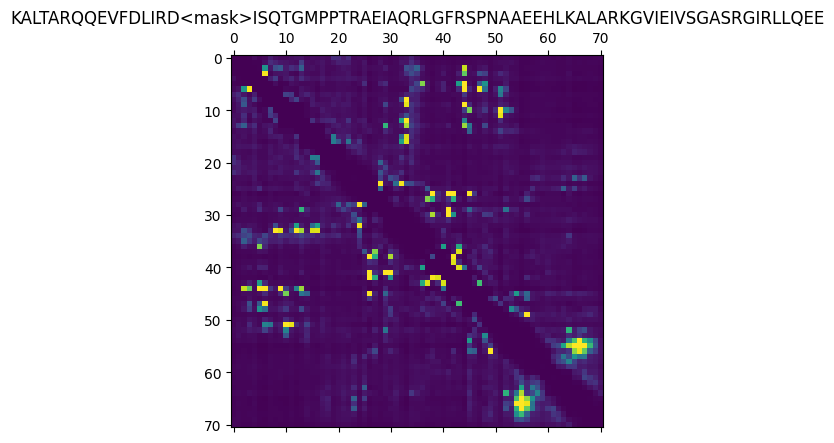

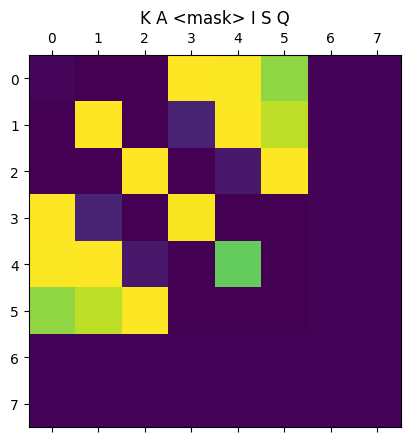

In [2]:
model.eval()  # disables dropout for deterministic results

# Prepare data (first 2 sequences from ESMStructuralSplitDataset superfamily / 4)
data = [
    ("protein1", "MKTVRQERLKSIVRILERSKEPVSGAQLAEELSVSRQVIVQDIAYLRSLGYNIVATPRGYVLAGG"),
    ("protein2", "KALTARQQEVFDLIRDHISQTGMPPTRAEIAQRLGFRSPNAAEEHLKALARKGVIEIVSGASRGIRLLQEE"),
    ("protein2 with mask","KALTARQQEVFDLIRD<mask>ISQTGMPPTRAEIAQRLGFRSPNAAEEHLKALARKGVIEIVSGASRGIRLLQEE"),
    ("protein3",  "K A <mask> I S Q"),
]
batch_labels, batch_strs, batch_tokens = batch_converter(data)
batch_lens = (batch_tokens != alphabet.padding_idx).sum(1)

# Extract per-residue representations (on CPU)
with torch.no_grad():
    results = model(batch_tokens, repr_layers=[6], return_contacts=True)
token_representations = results["representations"][6]

# Generate per-sequence representations via averaging
# NOTE: token 0 is always a beginning-of-sequence token, so the first residue is token 1.
sequence_representations = []
for i, tokens_len in enumerate(batch_lens):
    sequence_representations.append(token_representations[i, 1 : tokens_len - 1].mean(0))

# Look at the unsupervised self-attention map contact predictions
import matplotlib.pyplot as plt
for (_, seq), tokens_len, attention_contacts in zip(data, batch_lens, results["contacts"]):
    plt.matshow(attention_contacts[: tokens_len, : tokens_len])
    plt.title(seq)
    plt.show()

In [3]:
import torch
import esm

model = esm.pretrained.esmfold_v1()
model = model.eval().cuda()

# Optionally, uncomment to set a chunk size for axial attention. This can help reduce memory.
# Lower sizes will have lower memory requirements at the cost of increased speed.
# model.set_chunk_size(128)

sequence = "MKTVRQERLKSIVRILERSKEPVSGAQLAEELSVSRQVIVQDIAYLRSLGYNIVATPRGYVLAGG"
# Multimer prediction can be done with chains separated by ':'

with torch.no_grad():
    output = model.infer_pdb(sequence)

with open("result.pdb", "w") as f:
    f.write(output)

import biotite.structure.io as bsio
struct = bsio.load_structure("result.pdb", extra_fields=["b_factor"])
print(struct.b_factor.mean())  # this will be the pLDDT
# 88.3

ModuleNotFoundError: No module named 'openfold'

### Note 
It's similar to CRAP model, that it is not a generateive model, but a embedding model trained by either CNN or transformer, and can be connect to do other subsequet tasks. 

It can be used to do masked self attention predictions easily, and it is nice that ESM model provided easy methods to evaluate the results by self contact map or even esmfold and check b-factors. However, due to python package incompatibility, I could not get esm fold to work on my local machine.